In [1]:
from vivarium import Artifact
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

!whoami
!date

alibow
Tue Mar 31 14:55:28 PDT 2020


# FLOUR

In [2]:
cov = pd.DataFrame()
cov['location'] = ['Ethiopia','India','Nigeria']
cov['a_mean'] = [1,6.3,(22.7+5.4)/2]
cov['a_lower'] = [0.1,4.8,(20+3.8)/2]
cov['a_upper'] = [9.9,7.9,(25.5+6.9)/2]
cov['b_mean'] = [13.9,7.1,(83.8+13.8)/2]
cov['b_lower'] = [5,5.6,(81.4+11.5)/2]
cov['b_upper'] = [20,9.1,(86.2+16.1)/2]
cov['c_mean'] = [25.3,83.2,(83.9+14.2)/2]
cov['c_lower'] = [20,79.5,(81.5+11.8)/2]
cov['c_upper'] = [30,86.5,(86.3+16.5)/2]
cov

,location,a_mean,a_lower,a_upper,b_mean,b_lower,b_upper,c_mean,c_lower,c_upper
0,Ethiopia,1.00,0.1,9.9,13.9,5.00,20.00,25.30,20.00,30.0
1,India,6.30,4.8,7.9,7.1,5.60,9.10,83.20,79.50,86.5
2,Nigeria,14.05,11.9,16.2,48.8,46.45,51.15,49.05,46.65,51.4


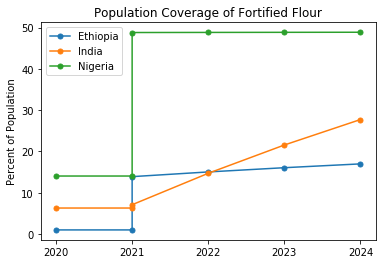

In [3]:
e = cov.where(cov['location'] == 'Ethiopia').dropna()
i = cov.where(cov['location'] == 'India').dropna()
n = cov.where(cov['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.title('Population Coverage of Fortified Flour')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

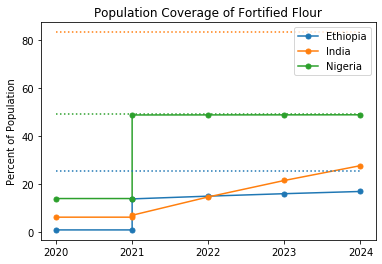

In [4]:
e = cov.where(cov['location'] == 'Ethiopia').dropna()
i = cov.where(cov['location'] == 'India').dropna()
n = cov.where(cov['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)


plt.plot(['2020','2021','2022','2023','2024'],
        [e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean']],
        linestyle='dotted',c='tab:blue')
plt.plot(['2020','2021','2022','2023','2024'],
        [i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values],
        linestyle='dotted',c='tab:orange')
plt.plot(['2020','2021','2022','2023','2024'],
        [n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values],
        linestyle='dotted',c='tab:green')

plt.title('Population Coverage of Fortified Flour')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

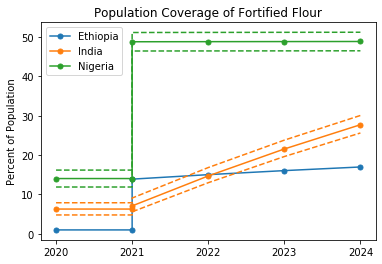

In [5]:
e = cov.where(cov['location'] == 'Ethiopia').dropna()
i = cov.where(cov['location'] == 'India').dropna()
n = cov.where(cov['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_lower'].values,i['a_lower'].values,i['b_lower'].values, 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*(1-0.1)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**2)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_lower'].values,n['a_lower'].values,n['b_lower'].values, 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*(1-0.1)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**2)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_upper'].values,i['a_upper'].values,i['b_upper'].values, 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*(1-0.1)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**2)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_upper'].values,n['a_upper'].values,n['b_upper'].values, 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*(1-0.1)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**2)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')


plt.title('Population Coverage of Fortified Flour')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

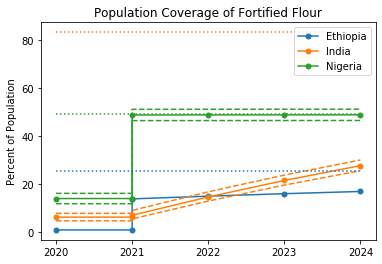

In [6]:
e = cov.where(cov['location'] == 'Ethiopia').dropna()
i = cov.where(cov['location'] == 'India').dropna()
n = cov.where(cov['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_lower'].values,i['a_lower'].values,i['b_lower'].values, 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*(1-0.1)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**2)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_lower'].values,n['a_lower'].values,n['b_lower'].values, 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*(1-0.1)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**2)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_upper'].values,i['a_upper'].values,i['b_upper'].values, 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*(1-0.1)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**2)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_upper'].values,n['a_upper'].values,n['b_upper'].values, 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*(1-0.1)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**2)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2022','2023','2024'],
        [e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean']],
        linestyle='dotted',c='tab:blue')
plt.plot(['2020','2021','2022','2023','2024'],
        [i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values],
        linestyle='dotted',c='tab:orange')
plt.plot(['2020','2021','2022','2023','2024'],
        [n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values],
        linestyle='dotted',c='tab:green')


plt.title('Population Coverage of Fortified Flour')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

# OIL

In [7]:
cov_oil = pd.DataFrame()
cov_oil['location'] = ['Ethiopia','India','Nigeria']
cov_oil['a_mean'] = [1,24.3,(7.6+7.2)/2]
cov_oil['a_lower'] = [0.1,21.1,(5.9+5.5)/2]
cov_oil['a_upper'] = [9.9,27.9,(9.4+8.9)/2]
cov_oil['b_mean'] = [44,89.4,(35.9+22.7)/2]
cov_oil['b_lower'] = [34,87,(32.7+19.9)/2]
cov_oil['b_upper'] = [54,91.8,(39.1+25.5)/2]
cov_oil['c_mean'] = [55,100,(98.4+98.6)/2]
cov_oil['c_lower'] = [45,100,(98.4+98.6)/2]
cov_oil['c_upper'] = [65,100,99.3]
cov_oil

,location,a_mean,a_lower,a_upper,b_mean,b_lower,b_upper,c_mean,c_lower,c_upper
0,Ethiopia,1.0,0.1,9.90,44.0,34.0,54.0,55.0,45.0,65.0
1,India,24.3,21.1,27.90,89.4,87.0,91.8,100.0,100.0,100.0
2,Nigeria,7.4,5.7,9.15,29.3,26.3,32.3,98.5,98.5,99.3


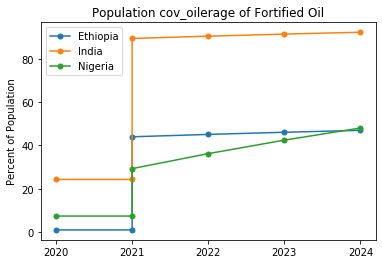

In [8]:
e = cov_oil.where(cov_oil['location'] == 'Ethiopia').dropna()
i = cov_oil.where(cov_oil['location'] == 'India').dropna()
n = cov_oil.where(cov_oil['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.title('Population cov_oilerage of Fortified Oil')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

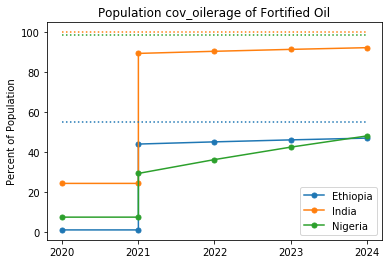

In [9]:
e = cov_oil.where(cov_oil['location'] == 'Ethiopia').dropna()
i = cov_oil.where(cov_oil['location'] == 'India').dropna()
n = cov_oil.where(cov_oil['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)


plt.plot(['2020','2021','2022','2023','2024'],
        [e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean']],
        linestyle='dotted',c='tab:blue')
plt.plot(['2020','2021','2022','2023','2024'],
        [i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values],
        linestyle='dotted',c='tab:orange')
plt.plot(['2020','2021','2022','2023','2024'],
        [n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values],
        linestyle='dotted',c='tab:green')

plt.title('Population cov_oilerage of Fortified Oil')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

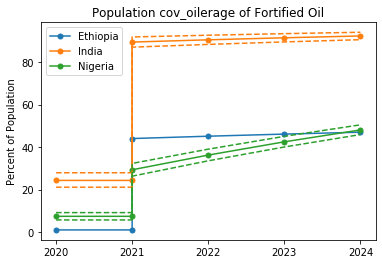

In [10]:
e = cov_oil.where(cov_oil['location'] == 'Ethiopia').dropna()
i = cov_oil.where(cov_oil['location'] == 'India').dropna()
n = cov_oil.where(cov_oil['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_lower'].values,i['a_lower'].values,i['b_lower'].values, 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*(1-0.1)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**2)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_lower'].values,n['a_lower'].values,n['b_lower'].values, 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*(1-0.1)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**2)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_upper'].values,i['a_upper'].values,i['b_upper'].values, 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*(1-0.1)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**2)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_upper'].values,n['a_upper'].values,n['b_upper'].values, 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*(1-0.1)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**2)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')


plt.title('Population cov_oilerage of Fortified Oil')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])

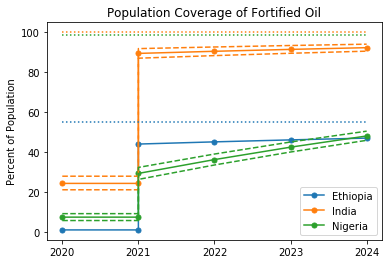

In [12]:
e = cov_oil.where(cov_oil['location'] == 'Ethiopia').dropna()
i = cov_oil.where(cov_oil['location'] == 'India').dropna()
n = cov_oil.where(cov_oil['location'] == 'Nigeria').dropna()

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [e['a_mean'].values,e['a_mean'].values,e['b_mean'].values, 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*(1-0.1)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**2)), 
             e['c_mean'].values-((e['c_mean'].values - e['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_mean'].values,i['a_mean'].values,i['b_mean'].values, 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*(1-0.1)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**2)), 
             i['c_mean'].values-((i['c_mean'].values - i['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_mean'].values,n['a_mean'].values,n['b_mean'].values, 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*(1-0.1)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**2)), 
             n['c_mean'].values-((n['c_mean'].values - n['b_mean'].values)*((1-0.1)**3))],
        marker='.', markersize=10)

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_lower'].values,i['a_lower'].values,i['b_lower'].values, 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*(1-0.1)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**2)), 
             i['c_lower'].values-((i['c_lower'].values - i['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_lower'].values,n['a_lower'].values,n['b_lower'].values, 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*(1-0.1)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**2)), 
             n['c_lower'].values-((n['c_lower'].values - n['b_lower'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2021','2022','2023','2024'],
            [i['a_upper'].values,i['a_upper'].values,i['b_upper'].values, 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*(1-0.1)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**2)), 
             i['c_upper'].values-((i['c_upper'].values - i['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:orange')
plt.plot(['2020','2021','2021','2022','2023','2024'],
            [n['a_upper'].values,n['a_upper'].values,n['b_upper'].values, 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*(1-0.1)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**2)), 
             n['c_upper'].values-((n['c_upper'].values - n['b_upper'].values)*((1-0.1)**3))],
        linestyle='dashed', markersize=10, c='tab:green')

plt.plot(['2020','2021','2022','2023','2024'],
        [e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean'],e['c_mean']],
        linestyle='dotted',c='tab:blue')
plt.plot(['2020','2021','2022','2023','2024'],
        [i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values,i['c_mean'].values],
        linestyle='dotted',c='tab:orange')
plt.plot(['2020','2021','2022','2023','2024'],
        [n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values,n['c_mean'].values],
        linestyle='dotted',c='tab:green')


plt.title('Population Coverage of Fortified Oil')
plt.ylabel('Percent of Population')
plt.legend(['Ethiopia','India','Nigeria'])